In [13]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label. Scaling will keep loss values and learning rates in a friendlier range.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


Examine the dataset

In [3]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


Define functions to build and train the model

In [4]:
def build_linear_reg_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    
    # Sequential: Most simple model, contains one or more layers
    linear_reg_model = tf.keras.models.Sequential()

    # Linear reg model has one node in a single layer. Dense() is used to create a fully-connected neuron layer
    linear_reg_model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) # units: number of neurons; input_shape: dimension of input data

    # compile to TF optimized code and config training to minimize MSE
    linear_reg_model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return linear_reg_model

def train_model(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # fit is the method used to train a model (contains the Training Loop)
    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs=epochs)
    
    trained_weights = model.get_weights()[0][0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    # gather a snapshot of each epoch
    hist = pd.DataFrame(history.history)

    # gather the MSE of each epoch
    rmse = hist["root_mean_squared_error"]

    return trained_weights, trained_bias, epochs, rmse

Define plotting functions

In [5]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

Hyperparameters and feature/label definition

In [6]:
# Hyperparameters:
learning_rate = 0.01
epochs = 30
batch_size = 30

# Define feature and label
my_feature = "total_rooms"
my_label= "median_house_value"

Call model functions

Epoch 1/30
567/567 [==============================] - 1s 707us/step - loss: 938867.8750 - root_mean_squared_error: 968.9520
Epoch 2/30
567/567 [==============================] - 0s 716us/step - loss: 27734.5156 - root_mean_squared_error: 166.5368
Epoch 3/30
567/567 [==============================] - 0s 700us/step - loss: 27080.8574 - root_mean_squared_error: 164.5626
Epoch 4/30
567/567 [==============================] - 0s 695us/step - loss: 26461.2461 - root_mean_squared_error: 162.6691
Epoch 5/30
567/567 [==============================] - 0s 698us/step - loss: 25645.2402 - root_mean_squared_error: 160.1413
Epoch 6/30
567/567 [==============================] - 0s 693us/step - loss: 25091.9609 - root_mean_squared_error: 158.4044
Epoch 7/30
567/567 [==============================] - 0s 702us/step - loss: 24083.3965 - root_mean_squared_error: 155.1883
Epoch 8/30
567/567 [==============================] - 0s 696us/step - loss: 23548.3965 - root_mean_squared_error: 153.4548
Epoch 9/30
567/

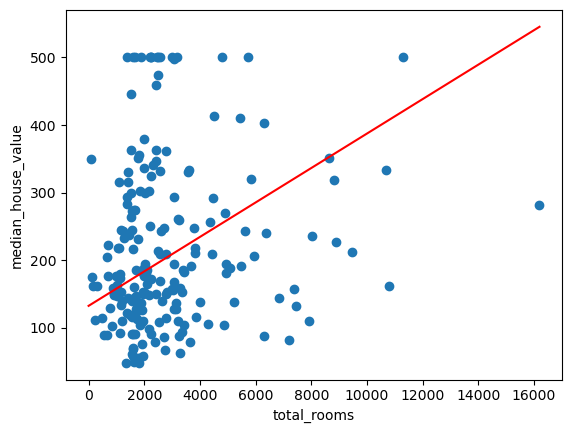

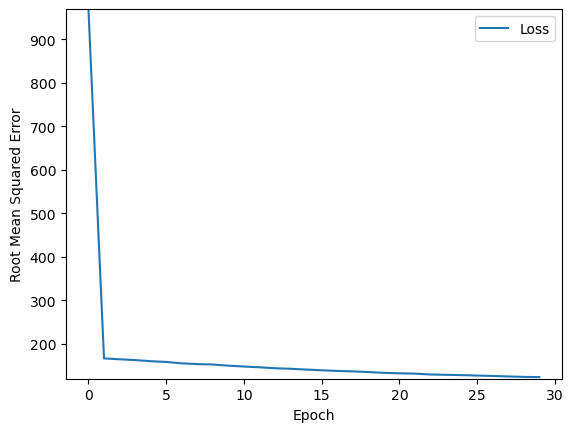

In [7]:
# Discard any pre-existing version of the model.
my_model = None

# Invoke functions
my_model = build_linear_reg_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model,
                                         training_df,
                                         my_feature, 
                                         my_label,
                                         epochs, 
                                         batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Using the model to make predictions

## Attention: you should make predictions on examples that are not used in training.
## However, for this exercise, you'll just work with a subset of the same training dataset.

In [8]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [9]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             182
 3400     92             219
 3677     69             226
 2202     62             189
 2403     80             194
 5652    295             277
 3318    500             217
 2552    342             198
 1364    118             167
 3468    128             221


### Most of the predicted values differ significantly from the label value, so the trained model probably doesn't have much predictive power. However, the first 10 examples might not be representative of the rest of the examples.  

Let´s try a different feature: population

Epoch 1/3
142/142 [==============================] - 0s 695us/step - loss: 3594333.5000 - root_mean_squared_error: 1895.8728
Epoch 2/3
142/142 [==============================] - 0s 674us/step - loss: 3429777.7500 - root_mean_squared_error: 1851.9659
Epoch 3/3
142/142 [==============================] - 0s 681us/step - loss: 3407485.7500 - root_mean_squared_error: 1845.9375


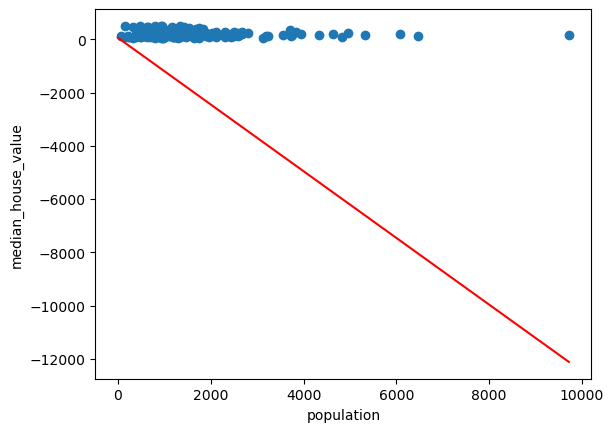

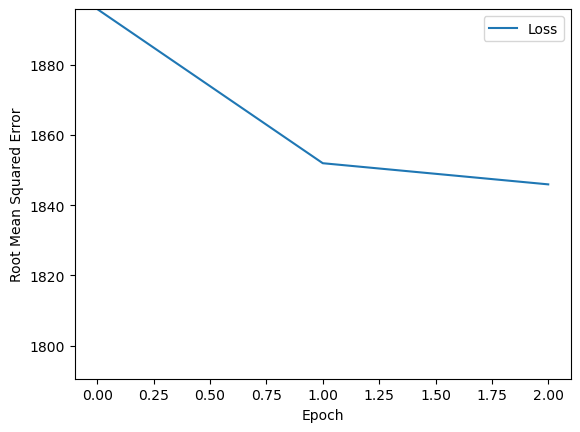

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53           -1557
 1867     92           -2285
 2191     69           -2690
 1052     62           -1264
 1647     80           -2009
 2312    295           -2842
 1604    500           -1955
 1066    342           -1281
  338    118            -369
 1604    128           -1955
 1200    187           -1449
  292     80            -312
 2014    112           -2469
 1817     95           -2222
 1328     69           -1609


In [10]:
my_feature = "population"

learning_rate = 2
epochs = 3
batch_size = 120

my_model = build_linear_reg_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

### Training is not entirely deterministic, but population typically converges at a slightly higher RMSE than total_rooms.  So, population appears to be about the same or slightly worse at making predictions than total_rooms.

# Defining a synthetic feature

`total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

Epoch 1/24
567/567 [==============================] - 1s 673us/step - loss: 37533.0664 - root_mean_squared_error: 193.7345
Epoch 2/24
567/567 [==============================] - 0s 689us/step - loss: 18785.7422 - root_mean_squared_error: 137.0611
Epoch 3/24
567/567 [==============================] - 0s 672us/step - loss: 15221.1982 - root_mean_squared_error: 123.3742
Epoch 4/24
567/567 [==============================] - 0s 672us/step - loss: 14939.3779 - root_mean_squared_error: 122.2267
Epoch 5/24
567/567 [==============================] - 0s 672us/step - loss: 14820.9609 - root_mean_squared_error: 121.7414
Epoch 6/24
567/567 [==============================] - 0s 672us/step - loss: 14611.6260 - root_mean_squared_error: 120.8786
Epoch 7/24
567/567 [==============================] - 0s 670us/step - loss: 14392.3418 - root_mean_squared_error: 119.9681
Epoch 8/24
567/567 [==============================] - 0s 664us/step - loss: 14252.4688 - root_mean_squared_error: 119.3837
Epoch 9/24
567/5

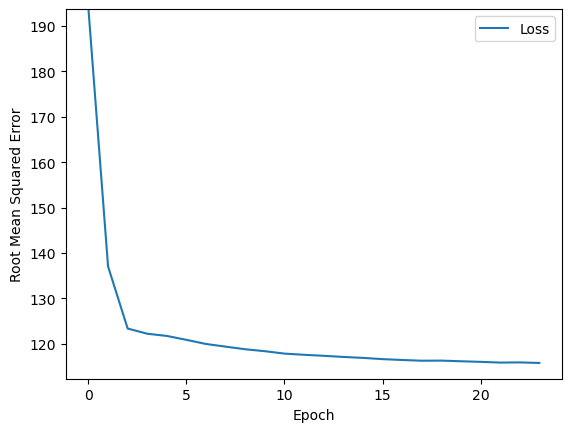

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             189
    2     92             201
    2     69             195
    2     62             211
    1     80             186
    2    295             225
    2    500             210
    2    342             223
    4    118             289
    2    128             214
    2    187             224
    3     80             235
    2    112             225
    2     95             219
    2     69             211


In [11]:
# defining the synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_linear_reg_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

Based on the loss values, this synthetic feature produces a better model than the individual features (looking at the loss graphic we can see that the training converge in a lower MSE).

# Using a correlation matrix

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls. 
  * `0.0`: no correlation; the two columns are not linearly related.

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

In [12]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


Adding better visualization to correlation matrix:

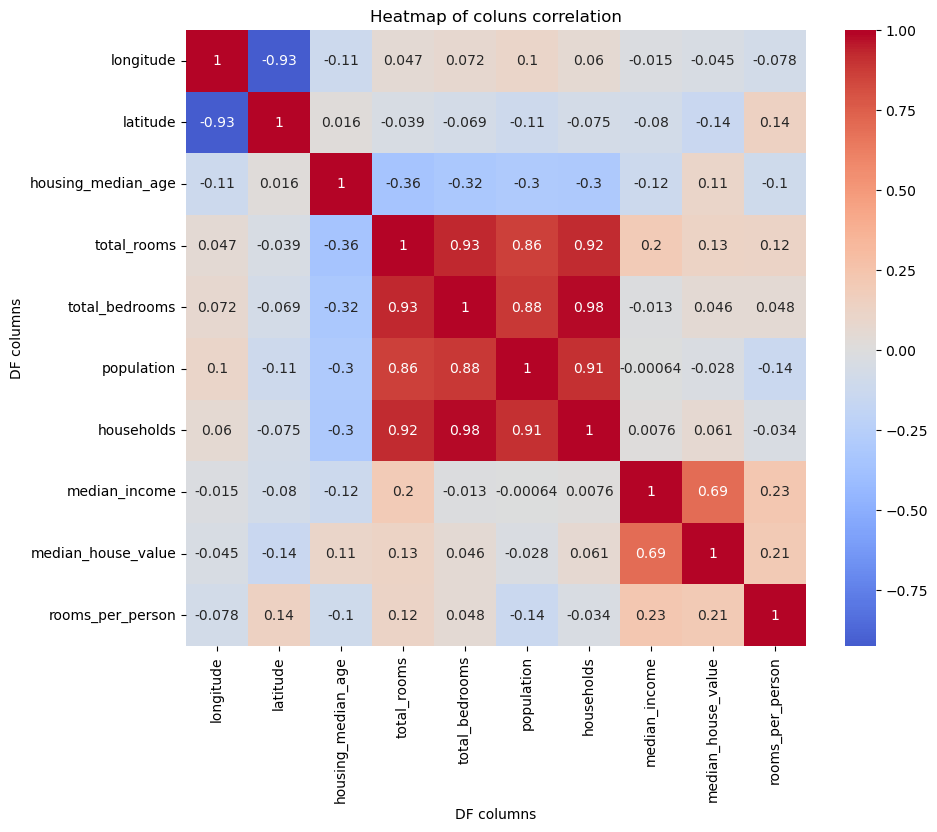

In [15]:
correlation_matrix = training_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

plt.title("Heatmap of coluns correlation")
plt.xlabel("DF columns")
plt.ylabel("DF columns")

plt.show()

The median_income correlates 0.7 with the label (median_house_value), so median_income might be a good feature. The other seven potential features all have a correlation relatively close to 0. 

Epoch 1/24
567/567 [==============================] - 1s 682us/step - loss: 27742.9785 - root_mean_squared_error: 166.5622
Epoch 2/24
567/567 [==============================] - 0s 673us/step - loss: 7364.5640 - root_mean_squared_error: 85.8170
Epoch 3/24
567/567 [==============================] - 0s 670us/step - loss: 7016.1025 - root_mean_squared_error: 83.7622
Epoch 4/24
567/567 [==============================] - 0s 673us/step - loss: 7015.8638 - root_mean_squared_error: 83.7607
Epoch 5/24
567/567 [==============================] - 0s 675us/step - loss: 7014.1831 - root_mean_squared_error: 83.7507
Epoch 6/24
567/567 [==============================] - 0s 670us/step - loss: 7012.2095 - root_mean_squared_error: 83.7389
Epoch 7/24
567/567 [==============================] - 0s 673us/step - loss: 7016.9683 - root_mean_squared_error: 83.7673
Epoch 8/24
567/567 [==============================] - 0s 670us/step - loss: 7015.9248 - root_mean_squared_error: 83.7611
Epoch 9/24
567/567 [==========

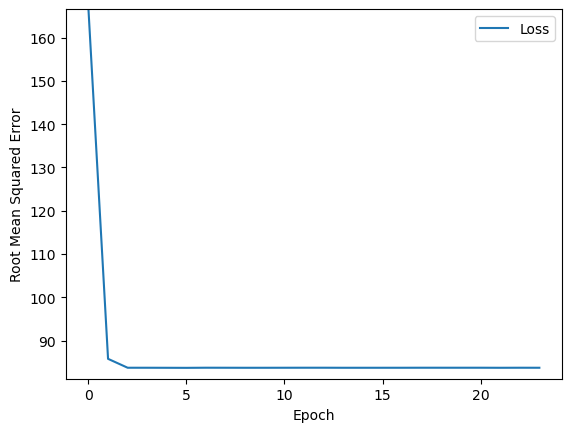

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             212
    3     69             154
    2     62             132
    3     80             153
    2    295             148
   10    500             457
    5    342             260
    2    118             147
    4    128             221
    8    187             397
    3     80             163
    3    112             179
    4     95             221
    2     69             143


In [16]:
my_feature = "median_income"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_linear_reg_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)